In [200]:
from tensorflow import keras
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory('./Train/', target_size=(224,224), color_mode='rgb', batch_size=30, class_mode='categorical', shuffle=True)

valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator=valid_datagen.flow_from_directory('./Valid/', target_size=(224,224), color_mode='rgb', batch_size=1, class_mode='categorical', shuffle=True)

from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Model

base_model=MobileNet(weights='imagenet',include_top=False)
output_model=base_model.output
output_model=GlobalAveragePooling2D()(output_model)
output_model=Dense(1024,activation='relu')(output_model)
output_model=Dense(512,activation='relu')(output_model)
numClasses = 10
output_model=Dense(numClasses,activation='softmax')(output_model)

for layer in base_model.layers:
    layer.trainable=False
    
model=Model(inputs=base_model.input,outputs=output_model)

    
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
step_size_train=train_generator.n//train_generator.batch_size
step_size_valid=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, validation_data=valid_generator, validation_steps =step_size_valid, epochs=10)

for layer in base_model.layers:
    layer.trainable=True
    
model.fit_generator(generator=train_generator, steps_per_epoch=step_size_train, validation_data=valid_generator, validation_steps =step_size_valid, epochs=5)

Found 100 images belonging to 10 classes.
Found 30 images belonging to 10 classes.
Epoch 1/10
3/3 [==============================] - 46s 15s/step - loss: 1.6677 - accuracy: 0.4222 - val_loss: 0.6358 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 35s 12s/step - loss: 0.7438 - accuracy: 0.8714 - val_loss: 0.1599 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 35s 12s/step - loss: 0.1198 - accuracy: 0.9714 - val_loss: 0.0679 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 35s 12s/step - loss: 0.0950 - accuracy: 0.9857 - val_loss: 0.2427 - val_accuracy: 0.9333
Epoch 5/10
3/3 [==============================] - 34s 11s/step - loss: 0.0829 - accuracy: 0.9571 - val_loss: 0.0478 - val_accuracy: 0.9667
Epoch 6/10
3/3 [==============================] - 36s 12s/step - loss: 0.0102 - accuracy: 1.0000 - val_loss: 0.0106 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 44s 15s/step - loss: 0.0028 - acc

In [201]:
model.save('our_first_convmodel3.h5')

In [186]:
model = load_model('our_first_convmodel3.h5')

In [187]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [202]:
import numpy as np
def answer(y):
    a = max(y[0])
    for i in range(len(y[0])):
        if (a == y[0][i]):
            j = i
            break
    if (j == 0):
        print('Это гора')
    elif (j == 1):
        print('Это котик')
    elif (j == 2):
        print('Это цветы')
    elif (j == 3):
        print('Это дерево')
    elif (j == 4):
        print('Это звёзды')
    elif (j == 5):
        print('Это камни')
    elif (j == 6):
        print('Это ковёр')
    elif (j == 7):
        print('Это машина')
    elif (j == 8):
        print('Это самолёт')
    elif (j == 9):
        print('Это хомяк')
    print(j)

In [203]:
valid_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
valid_generator=valid_datagen.flow_from_directory('./Proverka/', target_size=(224,224), color_mode='rgb', batch_size=1, class_mode='categorical', shuffle=True)
y = model.predict(valid_generator)
answer(y)

Found 1 images belonging to 1 classes.
Это дерево
3


In [107]:
from __future__ import absolute_import
from __future__ import division
import keras
from keras.datasets import mnist
import numpy as np
from tensorflow.keras.models import load_model

In [108]:
(x_train, _), (x_test, _) = mnist.load_data()
# Нормируем данные и приводим массивы к виду (N,size1,size1,1)
image_size = x_train.shape[1]


x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [109]:
noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise
# Ограничим итоговые значения интервалом [0,1]
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [168]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
latent_dim = 16
# Зададим два сверточных слоя и число нейронов в каждом слое:
layer_filters = [32, 64]

In [111]:
from tensorflow.keras.layers import Activation, Dense, Input
from tensorflow.keras.layers import Conv2D, Flatten
from tensorflow.keras.layers import Reshape, Conv2DTranspose
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt

In [169]:
encoder_inputs = Input(shape=input_shape, name='encoder_input')
x = encoder_inputs
# Стек из сверточных слоев (strides - дискрет сдвига окна свертки
# в пикселях, padding - без заполнения нулями):
for filters in layer_filters:
    x = Conv2D(filters=filters, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(x)

# Запоминаем размерность выхода для построения модели декодера
shape = K.int_shape(x)
# Преобразуем многомерный массив в вектор
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
# Итоговый код - одномерный вектор меньшей размерности (latent_dim)
# Итоговая модель энкодера:
encoder = Model(encoder_inputs , latent, name='encoder')

encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
flatten_26 (Flatten)         (None, 3136)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                50192     
Total params: 69,008
Trainable params: 69,008
Non-trainable params: 0
_________________________________________________________________


In [170]:
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# Обратное преобразование к размеру "shape":
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# Выход должен быть трехмерным массивом:
x = Reshape((shape[1], shape[2], shape[3]))(x)
# Вместо сверточных слоев "разверточные", цикл в обратном порядке:
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters, kernel_size=kernel_size, strides=2, activation='relu', padding='same')(x)

x = Conv2DTranspose(filters=1, kernel_size=kernel_size, padding='same')(x)
outputs = Activation('sigmoid', name='decoder_output')(x)
# Итоговая модель декодера:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
#Объединив две модели в одну мы получим наш автоэнкодер:
autoencoder = Model(encoder_inputs, decoder(encoder(encoder_inputs)), name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')
# Запускаем модель на обучение, используя незашумленные данные как эталонные значения.

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_21 (Dense)             (None, 3136)              53312     
_________________________________________________________________
reshape_21 (Reshape)         (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose_68 (Conv2DT (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_69 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_70 (Conv2DT (None, 28, 28, 1)         289       
_________________________________________________________________
decoder_output (Activation)  (None, 28, 28, 1)         0   

In [114]:
autoencoder.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=10, batch_size=batch_size)
autoencoder.save('autoencoder.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0607 - val_loss: 0.0315
Epoch 2/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0257 - val_loss: 0.0221
Epoch 3/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0211 - val_loss: 0.0200
Epoch 4/10
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0193 - val_loss: 0.0193
Epoch 5/10
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.0183 - val_loss: 0.0184
Epoch 6/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0177 - val_loss: 0.0174
Epoch 7/10
60000/60000 [==============================] - 106s 2ms/sample - loss: 0.0172 - val_loss: 0.0171
Epoch 8/10
60000/60000 [==============================] - 104s 2ms/sample - loss: 0.0168 - val_loss: 0.0169
Epoch 9/10
60000/60000 [==============================] - 100s 2ms/sample - loss: 0.01

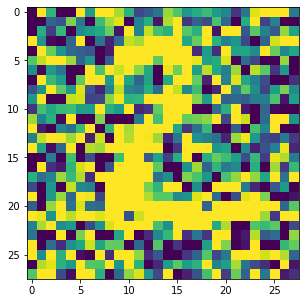

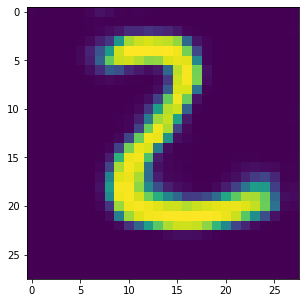

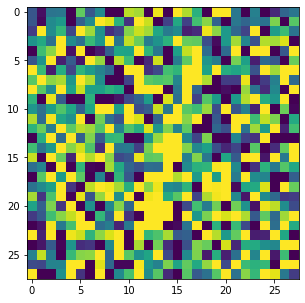

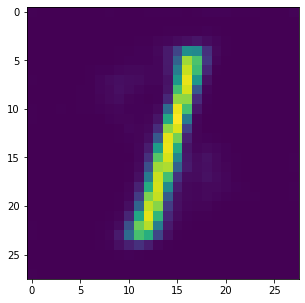

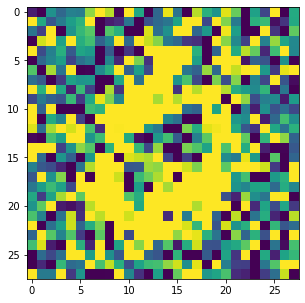

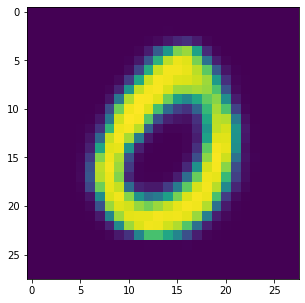

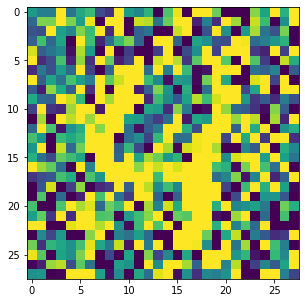

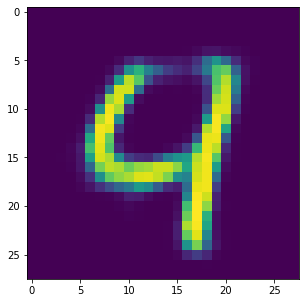

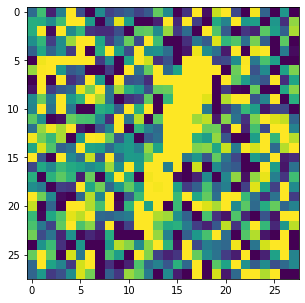

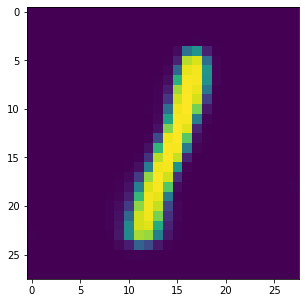

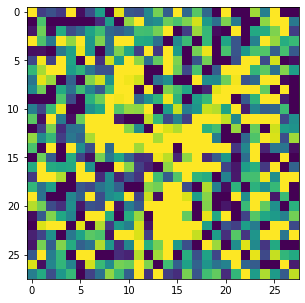

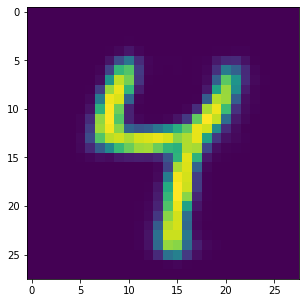

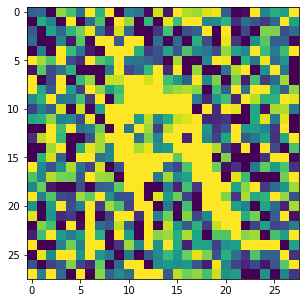

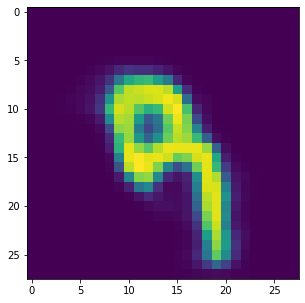

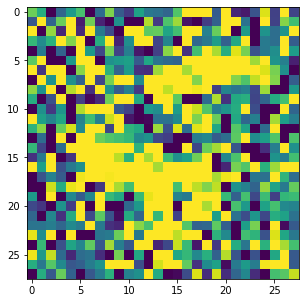

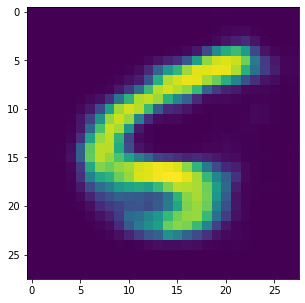

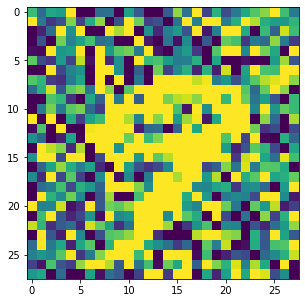

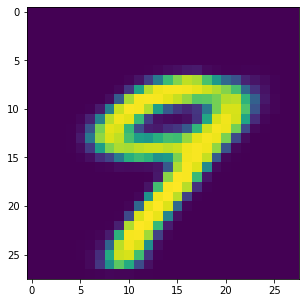

In [115]:
model = load_model('autoencoder.h5')
y = autoencoder.predict(x_test_noisy)
data_x = np.reshape(x_test_noisy, [-1, image_size, image_size])
data_y = np.reshape(y, [-1, image_size, image_size])

for i in range(1,10):
    
    fig, ax = plt.subplots()
    
    ax.imshow(data_x[i])
    
    fig.set_figwidth(5)    #  ширина и
    fig.set_figheight(5)    #  высота "Figure"
    
    plt.show()
    
    fig, ax = plt.subplots()
    
    ax.imshow(data_y[i])
    
    fig.set_figwidth(5)    #  ширина и
    fig.set_figheight(5)    #  высота "Figure"
    
    plt.show()
    

In [179]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = [3, 3, 1]
latent_dim = 16
# Зададим два сверточных слоя и число нейронов в каждом слое:
layer_filters = [32, 64, 128]
kern_stride = [2, 2, 1]

encoder_inputs = Input(shape=input_shape, name='encoder_input')
x = encoder_inputs
# Стек из сверточных слоев (strides - дискрет сдвига окна свертки
# в пикселях, padding - без заполнения нулями):
for i in range(len(layer_filters)):
    x = Conv2D(filters=layer_filters[i], kernel_size=kernel_size[i], strides=kern_stride[i], activation='relu', padding='same')(x)

# Запоминаем размерность выхода для построения модели декодера
shape = K.int_shape(x)
# Преобразуем многомерный массив в вектор
x = Flatten()(x)
latent = Dense(latent_dim, name='latent_vector')(x)
# Итоговый код - одномерный вектор меньшей размерности (latent_dim)
# Итоговая модель энкодера:
encoder = Model(encoder_inputs , latent, name='encoder')

encoder.summary()



Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 14, 14, 32)        320       
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 7, 7, 64)          18496     
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 7, 7, 128)         8320      
_________________________________________________________________
flatten_29 (Flatten)         (None, 6272)              0         
_________________________________________________________________
latent_vector (Dense)        (None, 16)                100368    
Total params: 127,504
Trainable params: 127,504
Non-trainable params: 0
_____________________________________________________

In [181]:
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
# Обратное преобразование к размеру "shape":
x = Dense(shape[1] * shape[2] * shape[3])(latent_inputs)
# Выход должен быть трехмерным массивом:
x = Reshape((shape[1], shape[2], shape[3]))(x)
# Вместо сверточных слоев "разверточные", цикл в обратном порядке:
for i in range(len(layer_filters) - 1,-1,-1):
    print(i)
    x = Conv2DTranspose(filters=layer_filters[i], kernel_size=kernel_size[i], strides=kern_stride[i], activation='relu', padding='same')(x)

x = Conv2DTranspose(filters=1, kernel_size=kernel_size[0], padding='same')(x)
outputs = Activation('sigmoid', name='decoder_output')(x)
# Итоговая модель декодера:
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
#Объединив две модели в одну мы получим наш автоэнкодер:
autoencoder = Model(encoder_inputs, decoder(encoder(encoder_inputs)), name='autoencoder')
autoencoder.compile(loss='mse', optimizer='adam')
# Запускаем модель на обучение, используя незашумленные данные как эталонные значения.

2
1
0
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 16)]              0         
_________________________________________________________________
dense_27 (Dense)             (None, 6272)              106624    
_________________________________________________________________
reshape_27 (Reshape)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_transpose_88 (Conv2DT (None, 7, 7, 128)         16512     
_________________________________________________________________
conv2d_transpose_89 (Conv2DT (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_transpose_90 (Conv2DT (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_91 (Conv2DT (None, 28, 28, 1)       

In [182]:
autoencoder.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=10, batch_size=batch_size)
autoencoder.save('autoencoder2.h5')

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 118s 2ms/sample - loss: 0.0560 - val_loss: 0.0252
Epoch 2/10
60000/60000 [==============================] - 109s 2ms/sample - loss: 0.0219 - val_loss: 0.0194
Epoch 3/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0188 - val_loss: 0.0179
Epoch 4/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0175 - val_loss: 0.0170
Epoch 5/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0167 - val_loss: 0.0166
Epoch 6/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0161 - val_loss: 0.0162
Epoch 7/10
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0157 - val_loss: 0.0159
Epoch 8/10
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0153 - val_loss: 0.0158
Epoch 9/10
60000/60000 [==============================] - 114s 2ms/sample - loss: 0.01

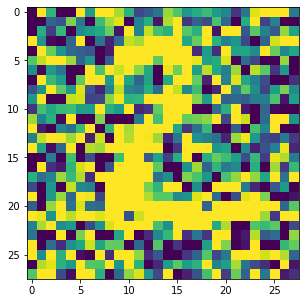

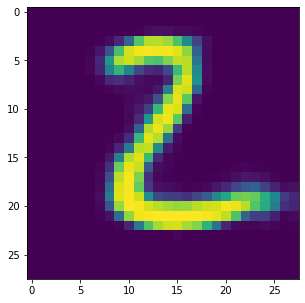

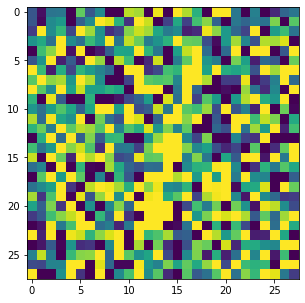

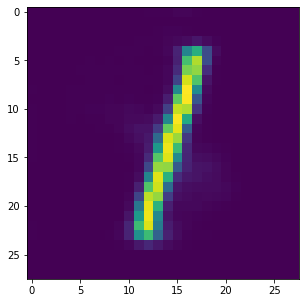

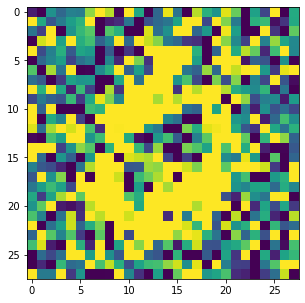

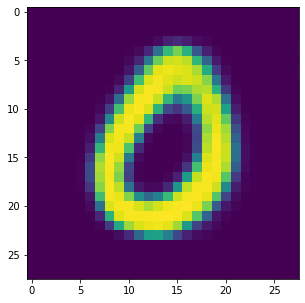

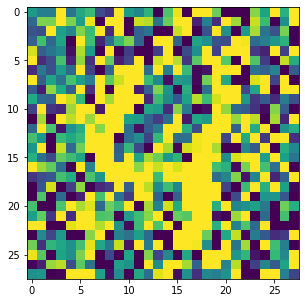

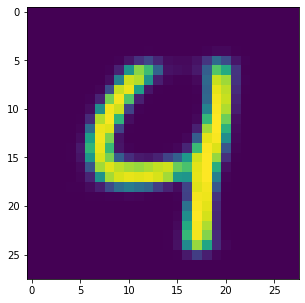

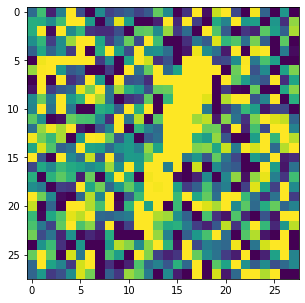

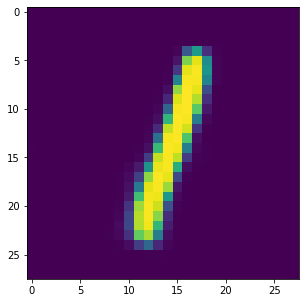

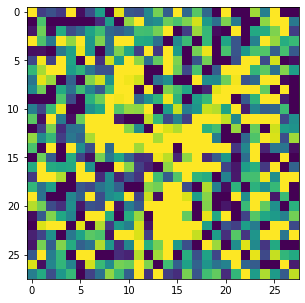

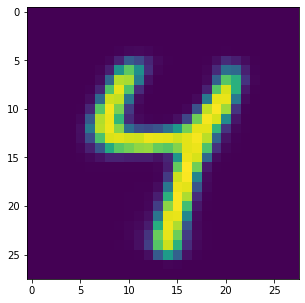

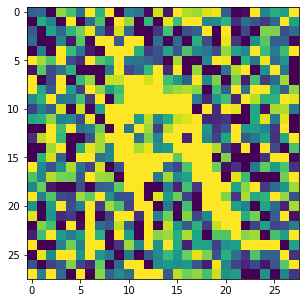

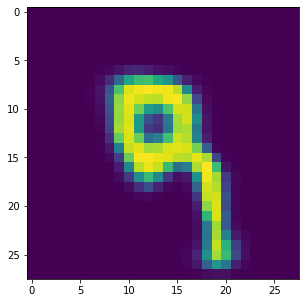

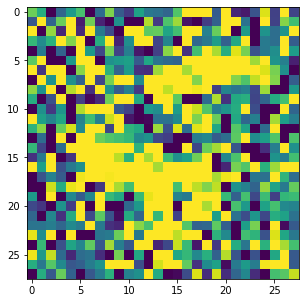

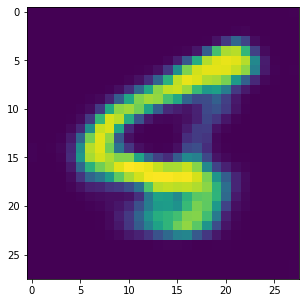

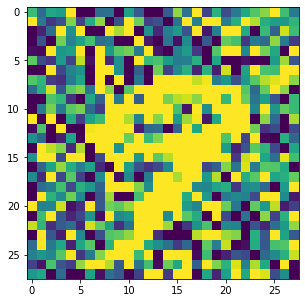

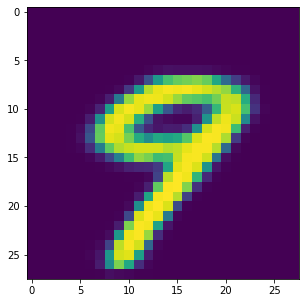

In [183]:
model = load_model('autoencoder2.h5')
y = autoencoder.predict(x_test_noisy)
data_x = np.reshape(x_test_noisy, [-1, image_size, image_size])
data_y = np.reshape(y, [-1, image_size, image_size])

for i in range(1,10):
    
    fig, ax = plt.subplots()
    
    ax.imshow(data_x[i])
    
    fig.set_figwidth(5)    #  ширина и
    fig.set_figheight(5)    #  высота "Figure"
    
    plt.show()
    
    fig, ax = plt.subplots()
    
    ax.imshow(data_y[i])
    
    fig.set_figwidth(5)    #  ширина и
    fig.set_figheight(5)    #  высота "Figure"
    
    plt.show()